# Análise dos Dados do Airbnb da cidade de *Atenas - Grécia*

O [Airbnb](https://www.airbnb.com.br/) está disponível em mais 191 países, sendo considerada a **maior empresa hoteleira da atualidade** sem nem ao menos **possuir um único hotel**!

Seja em uma casa na árvore durante um fim de semana, uma casa inteira para toda a família ou um castelo medieval, o viajante encontrará o lugar ideal para se hospedar. 

Isso é possível conectando pessoas que amam viajar e encontrar com anfitriões que queiram alugar seus imóveis de maneira prática, rápida e segura, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem inesquecível.

Desde a sua fundação, já passaram mais de 500 milhões de hóspedes pelas mais variadas propriedades espalhadas pelo mundo, desafiando as redes hoteleiras tradicionais e movimentando uma quantia superior a 65 bilhões de dólares para seus anfitriões.

Com a cultura de dados abertos e para colaborar com a comunidade científica, uma das iniciativas do Airbnb é disponibilizar dados da plataforma com algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

**Neste *notebook*, iremos analisar os dados referentes à Atenas capital da Grécia. A cidade também foi o centro da Grécia Antiga, um império e civilização poderosos, repleta histórias e monumentos do século V a.C., esta foi a contemplada para analisarmos como nossos viajantes estão sendo "tratados" ao redor mundo, extraindo insights a partir de dados brutos.**

<img style='float:right' alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg">


## Obtenção dos Dados


In [1]:
# Importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Importando o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/greece/attica/athens/2020-12-23/visualisations/listings.csv')

## Análise dos Dados
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# Mostrando as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,77,1,25,2020-10-06,0.21,6,0
1,10990,Athens Quality Apartments - Deluxe Apartment,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,38,1,44,2020-12-10,0.44,6,72
2,10993,Athens Quality Apartments - Studio,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,32,1,54,2020-12-09,0.54,6,218
3,10995,"AQA-No2 1-bedroom, smart tv, fiber connection,",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,45,1,23,2020-10-03,0.18,6,318
4,27262,"54m2, 1-br, cable tv, wi-fi, metro",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,39,1,17,2020-01-08,0.17,6,91


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

*OBS: Este dataset é a versão "resumida" da cidade de Atenas - Grécia.*

In [4]:
# Identificando o volume de dados do DataFrame
print(f'Nº de Entradas: {df.shape[0]}')
print(f'Nº de Variáveis: {df.shape[1]}')

# verificando os tipos da variáveis do DataFrame
display(df.dtypes)

Nº de Entradas: 9413
Nº de Variáveis: 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [11]:
# Dividindo os valores nulos pela quantidade total de entradas existentes no dataframe, multiplicando por 100 para 
# retornar o valor como porcentagem e ordenando por ordem decrescente.

((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

neighbourhood_group               100.000000
reviews_per_month                  22.798258
last_review                        22.798258
host_name                           0.095612
name                                0.031871
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

### **Qual o tipo de distribuição das variáveis?** 
Para melhor visualização, será utilizado um Histograma que é um gráfico que mostra a distribuição de acontecimentos registrados no Dataset.

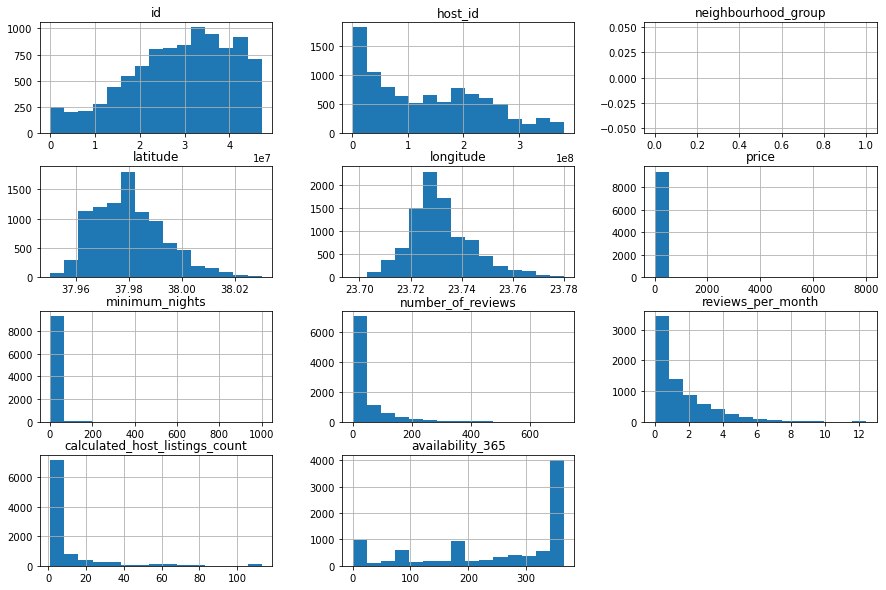

In [6]:
# Plotando o histograma das variáveis numéricas, o bins define a quantidade de barras e o figsize o tamanho do gráfico.
df.hist(bins=15, figsize=(15,10));

### **Verificando *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

Resumo estatístico por meio do método `describe()` e Plotar `boxplots` para a variável.

*OBS: Outliers são dados que se diferenciam drasticamente dos outros de um mesma coluna (variável).*

In [7]:
# Visualizando o resumo estatístico das por coluna com variáveis numéricas utilizando o "describe()"
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9413.000000,9413.000000,9413.000000,7267.000000,9413.000000,9413.000000
mean,68.862424,3.739828,37.659407,1.519487,9.668437,248.108042
std,243.839933,18.842543,64.352952,1.646004,18.480472,127.660362
min,7.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,30.000000,1.000000,1.000000,0.300000,1.000000,165.000000
50%,45.000000,2.000000,9.000000,0.920000,2.000000,304.000000
75%,69.000000,2.000000,46.000000,2.200000,8.000000,362.000000
max,8000.000000,1000.000000,714.000000,12.410000,113.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 69, porém seu valor máximo é 8000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano, alcançando 1000 dias.

#### Boxplot para minimum_nights
*OBS: O Boxplot é gráfico que permite visualizar a distribuição e valores discrepantes (outliers) dos dados, fornecendo assim um meio complementar para desenvolver uma perspectiva sobre o caráter dos dados.*

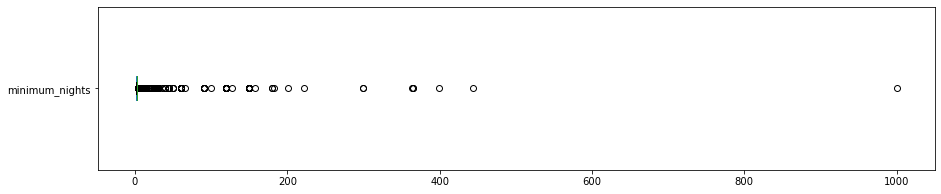

minimum_nights: Valores acima de 30 dias:
102 entradas
1.08%


In [8]:
# Plotanto Boxplot para a variável Minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Verificando a quantidade de valores acima de 30 dias para minimum_nights
print('minimum_nights: Valores acima de 30 dias:')
print("{} entradas".format(len(df[df.minimum_nights > 30])))

# Verificando a porcentagem de valores acima de 30 dias para minimum_nights
print("{:.2f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price
*Repetindo os mesmos procedimentos para a coluna price

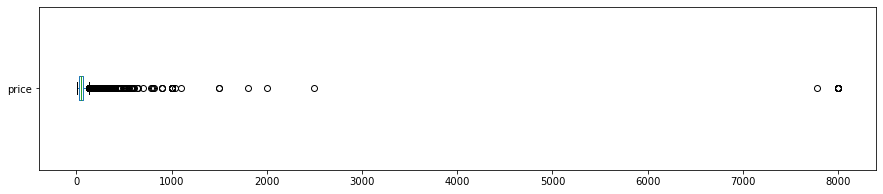


price: valores acima de 1000 euros
15 entradas
0.16%


In [14]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1000 para price
print("\nprice: valores acima de 1000 euros")
print("{} entradas".format(len(df[df.price > 1000])))

# Verificando a porcentagem de valores acima de 30 dias para price
print("{:.2f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

## Removendo os outliers das variáveis price e minimum_nights e plotando um novo Histograma

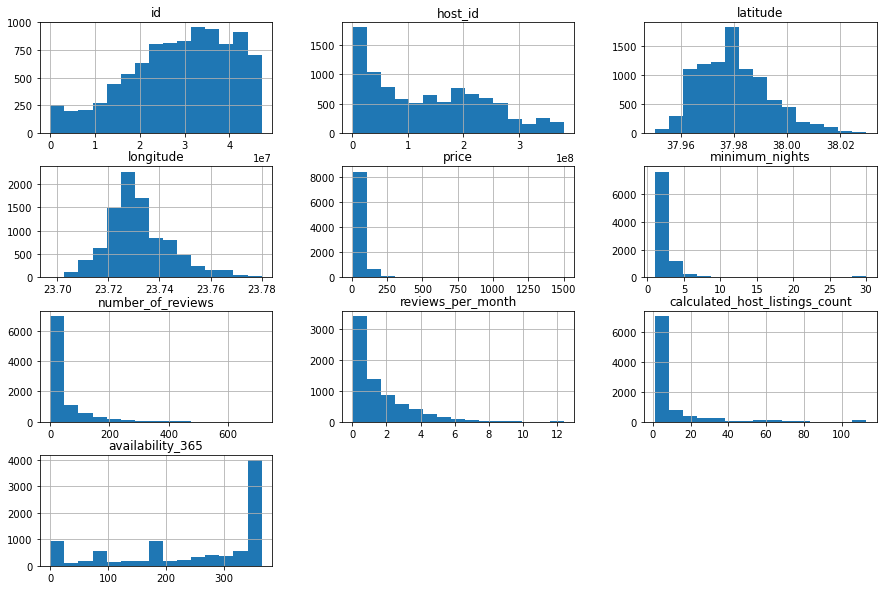

In [15]:
# Removendo os *outliers* e criando um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# Removendo `neighbourhood_group`, por se tratar de uma variável vazia.
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Plotando o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [17]:
# Verificando a média da coluna "price"
price_mean = float(df.price.mean())
print(f'A média de preços das diárias em Atenas é {(price_mean):.2f} euros')

A média de preços das diárias em Atenas é 68.86 euros


### **Verificando a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [18]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.032226,-0.089381,-0.088636,0.020204,0.059501
minimum_nights,-0.032226,1.000000,-0.052580,-0.097044,-0.072461,-0.046356
number_of_reviews,-0.089381,-0.052580,1.000000,0.806538,-0.003053,-0.023935
reviews_per_month,-0.088636,-0.097044,0.806538,1.000000,0.032911,0.004189
calculated_host_listings_count,0.020204,-0.072461,-0.003053,0.032911,1.000000,0.070501
availability_365,0.059501,-0.046356,-0.023935,0.004189,0.070501,1.000000


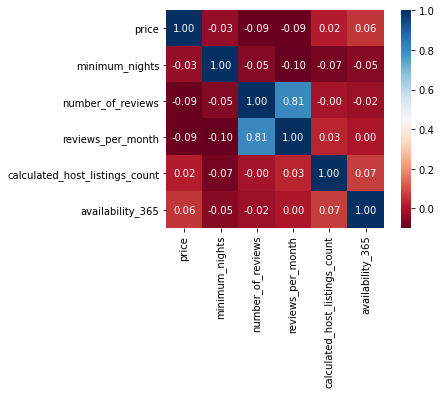

In [20]:
# Plotando um heatmap a partir das correlações
# Um mapa de calor (heatmap) é uma técnica de visualização de dados que mostra a magnitude de um fenômeno como cor em 
#duas dimensões. 
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### Identificando o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [21]:
# Apresentando a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    8194
Private room        862
Hotel room          171
Shared room          73
Name: room_type, dtype: int64

In [22]:
# Apresentando a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

Entire home/apt    88.107527
Private room        9.268817
Hotel room          1.838710
Shared room         0.784946
Name: room_type, dtype: float64

### **Localidade mais cara de Atenas?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [23]:
# Verificando os preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
ΡΗΓΙΛΛΗΣ                  106.307692
ΛΥΚΑΒΗΤΤΟΣ                 98.139535
ΚΕΡΑΜΕΙΚΟΣ                 85.704918
ΑΚΡΟΠΟΛΗ                   85.196078
ΖΑΠΠΕΙΟ                    81.295775
ΚΟΛΩΝΑΚΙ                   81.060976
ΒΟΤΑΝΙΚΟΣ                  78.000000
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ     76.607692
ΘΗΣΕΙΟ                     73.441281
ΙΛΙΣΙΑ                     72.067073
Name: price, dtype: float64

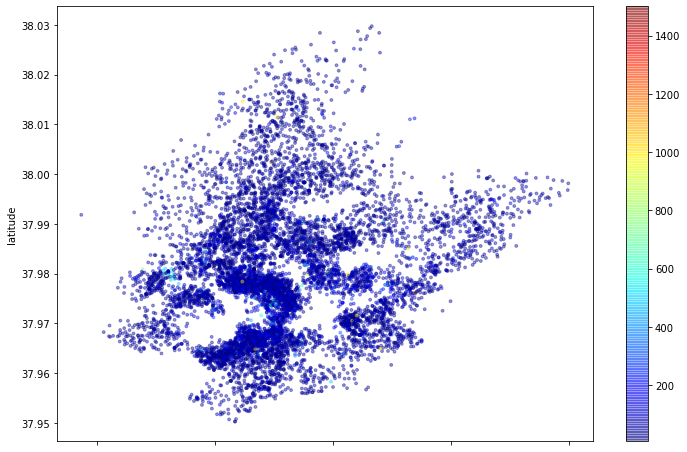

In [24]:
# Plotando os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [25]:
# Verificando a média da coluna `minimum_nights`
print(f'A média do mínimo de noites que um hóspede pode comprar é {df_clean.minimum_nights.mean():.2f}')

A média do mínimo de noites que um hóspede pode comprar é 2.26


## Conclusões
Considerando um Dataset resumido extraído do Airbnb da cidade de Atenas na Grécia, foi feita apenas uma análise superficial dos dados ali contidos. Foram encontrados Outliers em algumas variáveis, o que pode enviesar o estudo realizado, uma vez identificados, foram desconsiderados.

*ATENÇÃO: Neste caso, é de extrema importância conhecer os bairros do município, considerando o valor da diária, podem existir outliers nessa variável.*

**Para este estudo, foi utilizado as seguintes biblioteca:**

* pandas - Manipulação e análise de dados;

* matplotlib - Geração de Gráficos;

* seaborn - Melhora a qualidade dos gráficos.